Status: Optimal
Optimal units of Product A: 40.0
Optimal units of Product B: 20.0
Maximum Profit: $1400.0


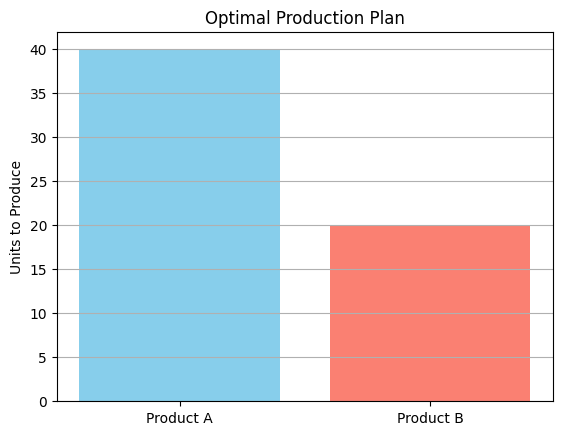

In [ ]:
!pip install pulp

# Import libraries
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, value
import matplotlib.pyplot as plt

# Define the LP problem
model = LpProblem("Product_Optimization", LpMaximize)

# Decision variables
x = LpVariable("Product_A", lowBound=0, cat="Continuous")
y = LpVariable("Product_B", lowBound=0, cat="Continuous")

# Objective function: Maximize profit
model += 20 * x + 30 * y, "Total_Profit"

# Constraints
model += 2 * x + 1 * y <= 100, "Machine_1_Capacity"
model += 1 * x + 2 * y <= 80, "Machine_2_Capacity"

# to Solve the problem
model.solve()

# Output results
print("Status:", LpStatus[model.status])
print(f"Optimal units of Product A: {x.varValue}")
print(f"Optimal units of Product B: {y.varValue}")
print(f"Maximum Profit: ${value(model.objective)}")

# Visualizing the results
products = ['Product A', 'Product B']
quantities = [x.varValue, y.varValue]

plt.bar(products, quantities, color=['skyblue', 'salmon'])
plt.title('Optimal Production Plan')
plt.ylabel('Units to Produce')
plt.grid(axis='y')
plt.show()
